In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file = ROOT.TFile.Open("run2_4hcopy_ratioFR_perhslice_cov_mat_final.root")
hist_tmp = ROOT.TH1D()
hist_tmp = file.Get("hcalo_ratio_1")

In [3]:
fit_start=30000
fit_stop=300000
fit_range=hist_tmp.FindBin(fit_stop)-hist_tmp.FindBin(fit_start)+1
y_val=np.empty(shape=(6,fit_range))
y_err=np.empty(shape=(6,fit_range))
x_val=np.empty(shape=(6,fit_range))
y_cov=np.empty(shape=(6,fit_range,fit_range))  

In [4]:
%%time
for icalo in range(0,6):
    hist = ROOT.TH1D()
    hcov = ROOT.TH2D()
    hist = file.Get("hcalo_ratio_"+str(icalo+1))
    for ibin in range (0,fit_range):
        y_val[icalo][ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
        y_err[icalo][ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
        x_val[icalo][ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
    hcov = file.Get("hcov_"+str(icalo+1))
    for irow in range (0, fit_range):
        for icol in range(0, fit_range):
            y_cov[icalo][irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
            
    hist.Reset()
    hcov.Reset()

CPU times: user 38.1 s, sys: 8.5 s, total: 46.6 s
Wall time: 46.6 s


In [5]:
for icalo in range(0,6):
    mat=np.linalg.eigvalsh(y_cov[icalo])
    for irow in range (0, fit_range):
        if mat[irow]<=0:
            print(icalo,irow,"\n")

In [6]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [7]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

asym=np.empty(6)
dasym=np.empty(6)
rval=np.empty(6)
drval=np.empty(6)
phi=np.empty(6)
dphi=np.empty(6)
A_cbo=np.empty(6)
dA_cbo=np.empty(6)
tau_cbo=np.empty(6)
dtau_cbo=np.empty(6)
omega_cbo=np.empty(6)
domega_cbo=np.empty(6)
phi_cbo=np.empty(6)
dphi_cbo=np.empty(6)
A_vbo_A=np.empty(6)
dA_vbo_A=np.empty(6)
phi_vbo_A=np.empty(6)
dphi_vbo_A=np.empty(6)
A_vbo_phi=np.empty(6)
dA_vbo_phi=np.empty(6)
phi_vbo_phi=np.empty(6)
dphi_vbo_phi=np.empty(6)
A_vw=np.empty(6)
dA_vw=np.empty(6)
tau_vw=np.empty(6)
dtau_vw=np.empty(6)
omega_vw=np.empty(6)
domega_vw=np.empty(6)
phi_vw=np.empty(6)
dphi_vw=np.empty(6)
A_y=np.empty(6)
dA_y=np.empty(6)
tau_y=np.empty(6)
dtau_y=np.empty(6)
omega_y=np.empty(6)
domega_y=np.empty(6)
phi_y=np.empty(6)
dphi_y=np.empty(6)
A_2cbo=np.empty(6)
dA_2cbo=np.empty(6)
tau_2cbo=np.empty(6)
dtau_2cbo=np.empty(6)
omega_2cbo=np.empty(6)
domega_2cbo=np.empty(6)
phi_2cbo=np.empty(6)
dphi_2cbo=np.empty(6)
red_chi2=np.empty(6)
calonum=np.empty(6)
res=np.empty(shape=(6,fit_range))
fou=np.empty(shape=(6,fit_range))
xfft=np.empty(shape=(6,fit_range))
res2=np.empty(shape=(6,fit_range))
fou2=np.empty(shape=(6,fit_range))
xfft2=np.empty(shape=(6,fit_range))

In [8]:
def fit_func3(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0)-> np.double:
    
    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f - ff - fb)/(2*f + ff + fb) 

In [9]:
def fit_func7(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0,
              asym_vw = 0.0,
              tau_vw = 0.0,
              omega_vw = 0.0,
              phi_vw = 0.0)-> np.double:
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Nvw - ff*Nvwf - fb*Nvwb)/(2*f*Nvw + ff*Nvwf + fb*Nvwb)

In [10]:
def fit_func11(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_vw = 0.0,
               tau_vw = 0.0,
               omega_vw = 0.0,
               phi_vw = 0.0,
               asym_vbo = 0.0,
               tau_vbo=0.0,
               omega_vbo= 0.0,
               phi_vbo=0.0)-> np.double:
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Nvw*Nvbo - ff*Nvwf*Nvbof - fb*Nvwb*Nvbob)/(2*f*Nvw*Nvbo + ff*Nvwf*Nvbof + fb*Nvwb*Nvbob)

In [11]:
def fit_func15(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_vw = 0.0,
               tau_vw = 0.0,
               omega_vw = 0.0,
               phi_vw = 0.0,
               asym_vbo = 0.0,
               tau_vbo=0.0,
               omega_vbo= 0.0,
               phi_vbo=0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0)-> np.double:
    

    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))


    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [12]:
def fit_func19(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_vw = 0.0,
               tau_vw = 0.0,
               omega_vw = 0.0,
               phi_vw = 0.0,
               asym_vbo = 0.0,
               tau_vbo=0.0,
               omega_vbo= 0.0,
               phi_vbo=0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_vbo_A = 0.0,
               phi_vbo_A=0.0,
               A_vbo_phi= 0.0,
               phi_vbo_phi=0.0)-> np.double:
    
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    
    Avbo=(1+ asym_vbo_A*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo_A));
    Avbof=(1+ asym_vbo_A*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo_A))
    Avbob=(1+ asym_vbo_A*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo_A))
    
    phivbo=(A_vbo_phi*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo_phi))
    phivbof=(A_vbo_phi*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo_phi))
    phivbob=(A_vbo_phi*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo_phi))
   
    

    f=(1+ asym*Avbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phivbo))

    ff=(1+ asym*Avbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phivbof))

    fb=(1+ asym*Avbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phivbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [13]:
def fit_func21(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_vw = 0.0,
               tau_vw = 0.0,
               omega_vw = 0.0,
               phi_vw = 0.0,
               asym_vbo = 0.0,
               tau_vbo=0.0,
               omega_vbo= 0.0,
               phi_vbo=0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_vbo_A = 0.0,
               phi_vbo_A=0.0,
               A_vbo_phi= 0.0,
               phi_vbo_phi=0.0,
               asym_2cbo = 0.0,
               phi_2cbo = 0.0)-> np.double:
    
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    
    Avbo=(1+ asym_vbo_A*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo_A));
    Avbof=(1+ asym_vbo_A*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo_A))
    Avbob=(1+ asym_vbo_A*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo_A))
    
    phivbo=(A_vbo_phi*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo_phi))
    phivbof=(A_vbo_phi*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo_phi))
    phivbob=(A_vbo_phi*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo_phi))
    
    N2cbo=(asym_2cbo*exp(-2*time/tau_cbo)*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-2*(time + T_a/2)/tau_cbo)*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-2*(time - T_a/2)/tau_cbo)*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob
   
    

    f=(1+ asym*Avbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phivbo))

    ff=(1+ asym*Avbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phivbof))

    fb=(1+ asym*Avbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phivbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [14]:
def fit_func23(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_vw = 0.0,
               tau_vw = 0.0,
               omega_vw = 0.0,
               phi_vw = 0.0,
               asym_vbo = 0.0,
               tau_vbo=0.0,
               omega_vbo= 0.0,
               phi_vbo=0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_vbo_A = 0.0,
               phi_vbo_A=0.0,
               A_vbo_phi= 0.0,
               phi_vbo_phi=0.0,
               asym_2cbo = 0.0,
               phi_2cbo = 0.0,
               A_cbovw = 0.0,
               phi_cbovw = 0.0)-> np.double:
    
    tau_cbovw = 51430
    omega_cbovw = 0.01197
    
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    
    Avbo=(1+ asym_vbo_A*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo_A));
    Avbof=(1+ asym_vbo_A*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo_A))
    Avbob=(1+ asym_vbo_A*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo_A))
    
    phivbo=(A_vbo_phi*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo_phi))
    phivbof=(A_vbo_phi*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo_phi))
    phivbob=(A_vbo_phi*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo_phi))
    
    N2cbo=(asym_2cbo*exp(-2*time/tau_cbo)*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-2*(time + T_a/2)/tau_cbo)*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-2*(time - T_a/2)/tau_cbo)*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob
    
    Ncbovw=(1+ A_cbovw*exp(-time/tau_cbovw)*cos(omega_cbovw*time - phi_cbovw))
    Ncbovwf=(1+ A_cbovw*exp(-(time + T_a/2)/tau_cbovw)*cos(omega_cbovw*(time + T_a/2) - phi_cbovw))
    Ncbovwb=(1+ A_cbovw*exp(-(time - T_a/2)/tau_cbovw)*cos(omega_cbovw*(time - T_a/2) - phi_cbovw))
   
    

    f=(1+ asym*Avbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phivbo))

    ff=(1+ asym*Avbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phivbof))

    fb=(1+ asym*Avbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phivbob))

    
    return (2*f*Ncbo*Nvw*Nvbo*Ncbovw - ff*Ncbof*Nvwf*Nvbof*Ncbovwf - fb*Ncbob*Nvwb*Nvbob*Ncbovwb)/(2*f*Ncbo*Nvw*Nvbo*Ncbovw + ff*Ncbof*Nvwf*Nvbof*Ncbovwf + fb*Ncbob*Nvwb*Nvbob*Ncbovwb)

In [15]:
p_init3=[2.28839e-01,
        0.000000,
        4.02055e+00]

In [16]:
%%time
for icalo in range(0,6): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_err[icalo]) 
    
    p_init_final=pars3
    
    pars2, cov_final = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    res[icalo] = (y_val[icalo] - fit_func3(x_val[icalo], *pars2))/y_err[icalo]
    fou[icalo]=abs(np.fft.fft(res[icalo]))
    xfft[icalo]= np.linspace(0,6.667,num=1801)
    
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]

CPU times: user 4.74 s, sys: 3.41 s, total: 8.15 s
Wall time: 1.18 s


(0.0, 3.3335)

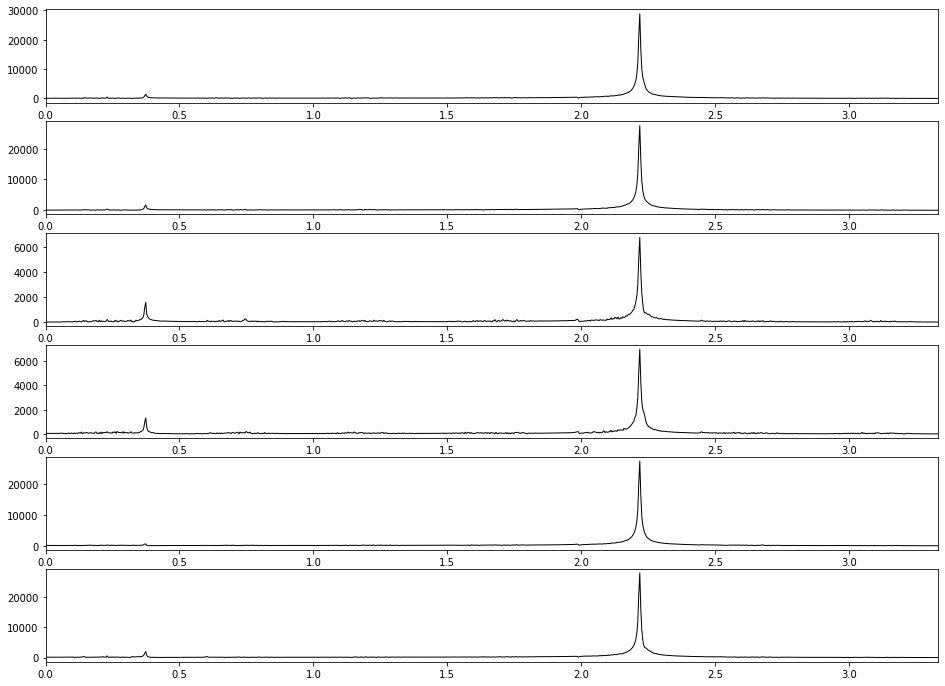

In [17]:
plt.figure(figsize=(16,12))
# fist line:
plt.subplot(611)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[0], fou[0], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)

 
# second line
plt.subplot(612)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[1], fou[1], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(613)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[2], fou[2], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(614)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[3], fou[3], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(615)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[4], fou[4], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(616)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[5], fou[5], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)





In [18]:
%%time
for icalo in range(0,6): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_err[icalo]) 
    
    p_init7=[pars3[0],
             pars3[1],
             pars3[2],
             0.04,
             60000,
             0.01389,
             3.6]
    
    pars7, cov7 = opt.curve_fit(f=fit_func7, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init7, sigma=y_err[icalo])
    
    p_init11=[pars7[0],
              pars7[1],
              pars7[2],
              pars7[3],
              pars7[4],
              pars7[5],
              pars7[6],
              0.06,
              23000,
              0.01407,
              1.5]
    
    pars11, cov11 = opt.curve_fit(f=fit_func11, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init11, sigma=y_err[icalo])

    p_init15=[pars11[0],
              pars11[1],
              pars11[2],
              pars11[3],
              pars11[4],
              pars11[5],
              pars11[6],
              pars11[7],
              pars11[8],
              pars11[9],
              pars11[10],
              0.02,
              225000,
              0.002332,
              2.5]
    
    pars15, cov15 = opt.curve_fit(f=fit_func15, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init15, sigma=y_err[icalo])
    
    p_init19=[pars15[0],
              pars15[1],
              pars15[2],
              pars15[3],
              pars15[4],
              pars15[5],
              pars15[6],
              pars15[7],
              pars15[8],
              pars15[9],
              pars15[10],
              pars15[11],
              pars15[12],
              pars15[13],
              pars15[14],
              0.008,
              1.15,
              0.01,
              3.1]
    
    pars19, cov19 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init19, sigma=y_err[icalo])
    
    p_init21=[pars19[0],
              pars19[1],
              pars19[2],
              pars19[3],
              pars19[4],
              pars19[5],
              pars19[6],
              pars19[7],
              pars19[8],
              pars19[9],
              pars19[10],
              pars19[11],
              pars19[12],
              pars19[13],
              pars19[14],
              pars19[15],
              pars19[16],
              pars19[17],
              pars19[18],
              0.01,
              3.1]
    
    pars21, cov21 = opt.curve_fit(f=fit_func21, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init21, sigma=y_err[icalo])
    
    p_init23=[pars21[0],
              pars21[1],
              pars21[2],
              pars21[3],
              pars21[4],
              pars21[5],
              pars21[6],
              pars21[7],
              pars21[8],
              pars21[9],
              pars21[10],
              pars21[11],
              pars21[12],
              pars21[13],
              pars21[14],
              pars21[15],
              pars21[16],
              pars21[17],
              pars21[18],
              pars21[19],
              pars21[20],
              0.01,
              3.1]
    
    pars23, cov23 = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init23, sigma=y_err[icalo])

    
    pars_final, cov2 = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=pars23, sigma=y_cov[icalo])
    
    stdevs=np.sqrt(np.diag(cov2))
    
    asym[icalo]=pars_final[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars_final[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars_final[2]
    dphi[icalo]=stdevs[2]
    A_y[icalo]=pars_final[3]
    dA_y[icalo]=stdevs[3]
    tau_y[icalo]=pars_final[4]
    dtau_y[icalo]=stdevs[4]
    omega_y[icalo]=pars_final[5]
    domega_y[icalo]=stdevs[5]
    phi_y[icalo]=pars_final[6]
    dphi_y[icalo]=stdevs[6]
    A_vw[icalo]=pars_final[7]
    dA_vw[icalo]=stdevs[7]
    tau_vw[icalo]=pars_final[8]
    dtau_vw[icalo]=stdevs[8]
    omega_vw[icalo]=pars_final[9]
    domega_vw[icalo]=stdevs[9]
    phi_vw[icalo]=pars_final[10]
    dphi_vw[icalo]=stdevs[10]
    A_cbo[icalo]=pars_final[11]
    dA_cbo[icalo]=stdevs[11]
    tau_cbo[icalo]=pars_final[12]
    dtau_cbo[icalo]=stdevs[12]
    omega_cbo[icalo]=pars_final[13]
    domega_cbo[icalo]=stdevs[13]
    phi_cbo[icalo]=pars_final[14]
    dphi_cbo[icalo]=stdevs[14]
    A_vbo_A[icalo]=pars_final[15]
    dA_vbo_A[icalo]=stdevs[15]
    phi_vbo_A[icalo]=pars_final[16]
    dphi_vbo_A[icalo]=stdevs[16]
    A_vbo_phi[icalo]=pars_final[17]
    dA_vbo_phi[icalo]=stdevs[17]
    phi_vbo_phi[icalo]=pars_final[18]
    dphi_vbo_phi[icalo]=stdevs[18]
    
    chi2=np.dot((np.transpose(y_val[icalo]-fit_func23(x_val[icalo], *pars_final))),(np.dot((np.linalg.inv(y_cov[icalo])),(y_val[icalo]-fit_func23(x_val[icalo], *pars_final)))))
    red_chi2[icalo]=chi2/(fit_range-len(pars2))
    
    res2[icalo] = (y_val[icalo] - fit_func23(x_val[icalo], *pars_final))/y_err[icalo]
    fou2[icalo]=abs(np.fft.fft(res2[icalo]))
    xfft2[icalo]= np.linspace(0,6.667,num=1801)
    
    calonum[icalo]=icalo+1

CPU times: user 1min 24s, sys: 16.7 s, total: 1min 41s
Wall time: 1min 1s


In [19]:
pars_final

array([ 2.03577724e-01, -4.51110747e+01,  3.84639459e+00,  8.62975800e-02,
        8.87624496e+04,  1.39268582e-02,  5.77940940e+00,  2.00708725e-02,
        3.35514732e+04,  1.40019925e-02, -5.86047492e-01, -5.95640173e-03,
        3.81594647e+05,  2.34238081e-03,  2.69104314e+00,  2.14786595e-03,
        1.90490779e+00,  1.00129371e-02,  3.79733206e+00, -2.49610786e-04,
        4.38900679e+00, -5.50153682e-02,  5.08325789e+01])

In [20]:
stdevs

array([5.32364509e-05, 3.35009423e+00, 5.04013911e-04, 4.08004429e-04,
       4.76611325e+02, 6.10544077e-08, 4.79400103e-03, 1.21644024e-03,
       1.36386434e+03, 1.22119109e-06, 6.25398534e-02, 1.32120554e-04,
       3.65491034e+04, 2.51734240e-07, 2.22915260e-02, 1.59224319e-03,
       7.46235655e-01, 1.67775632e-03, 1.63293291e-01, 8.01225678e-05,
       3.21300398e-01, 1.59383690e-02, 2.88933671e-01])

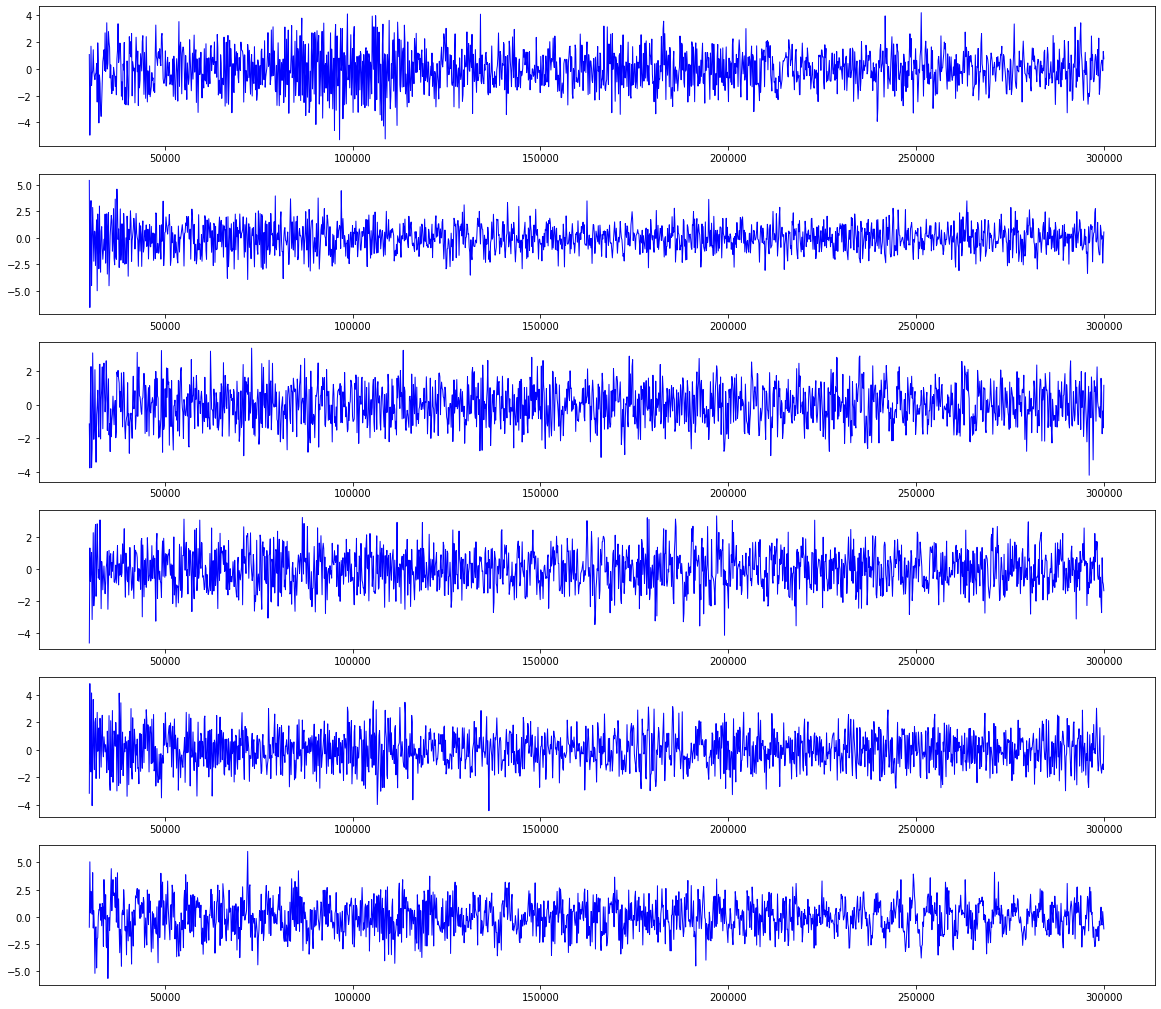

In [21]:
plt.figure(figsize=(20,18))
# fist line:
plt.subplot(611)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(x_val[0], res2[0], linestyle='solid', linewidth=1, color='blue')
#plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)

 
# second line
plt.subplot(612)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(x_val[1], res2[1], linestyle='solid', linewidth=1, color='blue')
#plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(613)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(x_val[2], res2[2], linestyle='solid', linewidth=1, color='blue')
#plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(614)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(x_val[3], res2[3], linestyle='solid', linewidth=1, color='blue')
#plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(615)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(x_val[4], res2[4], linestyle='solid', linewidth=1, color='blue')
#plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(616)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(x_val[5], res2[5], linestyle='solid', linewidth=1, color='blue')
#plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)


#plt.savefig('run3NO_caloscan_R.jpg')

(0.0, 3.3335)

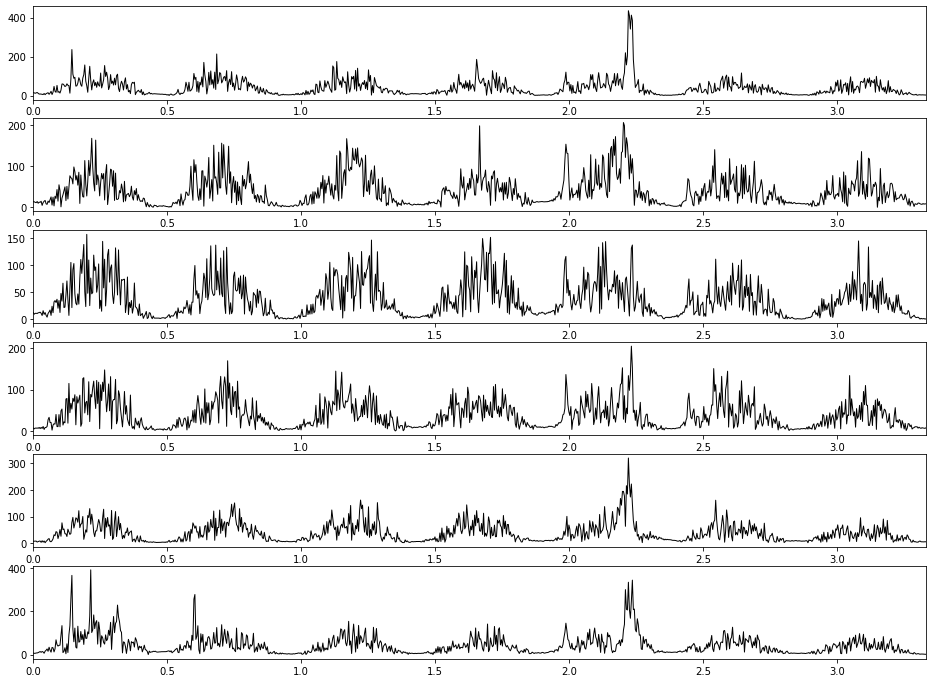

In [22]:
plt.figure(figsize=(16,12))
# fist line:
plt.subplot(611)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[0], fou2[0], linestyle='solid', linewidth=1, color='black')
#plt.xlim(left=2.1, right=2.4)
plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)

 
# second line
plt.subplot(612)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[1], fou2[1], linestyle='solid', linewidth=1, color='black')
#plt.xlim(left=2.1, right=2.4)
plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(613)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[2], fou2[2], linestyle='solid', linewidth=1, color='black')
#plt.xlim(left=2.1, right=2.4)
plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(614)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[3], fou2[3], linestyle='solid', linewidth=1, color='black')
#plt.xlim(left=2.1, right=2.4)
plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(615)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[4], fou2[4], linestyle='solid', linewidth=1, color='black')
#plt.xlim(left=2.1, right=2.4)
plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(616)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[5], fou2[5], linestyle='solid', linewidth=1, color='black')
#plt.xlim(left=2.1, right=2.4)
plt.xlim(0,6.667/2)
#plt.ylim(-10,4000)





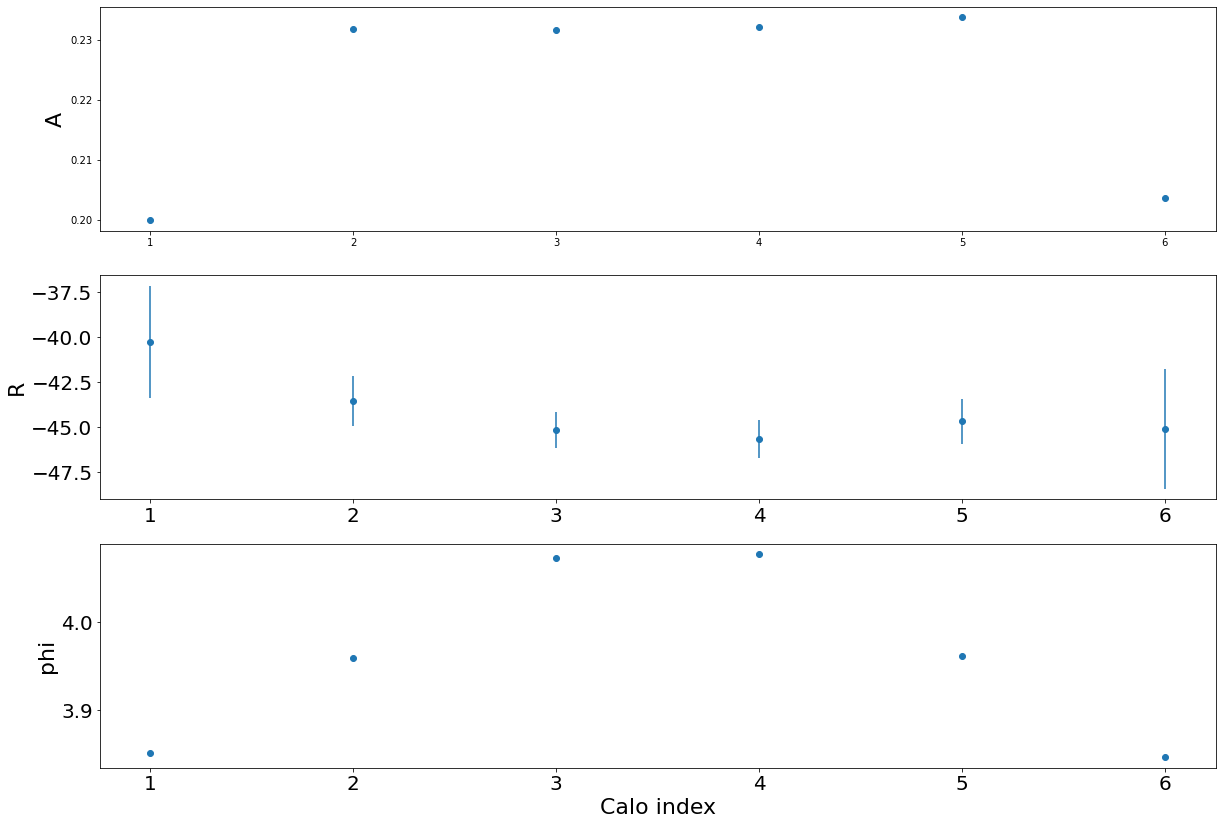

In [23]:
plt.figure(figsize=(20,14))
# fist line:
plt.subplot(311)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, asym, yerr=dasym, fmt="o")
plt.ylabel('A',fontsize=22)

plt.subplot(312)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.ylabel('R',fontsize=22)
 
# second line
plt.subplot(313)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, phi, yerr=dphi, fmt="o")
plt.xlabel('Calo index',fontsize=22)
plt.ylabel('phi',fontsize=22)

plt.show()
#plt.savefig('run3NO_caloscan_A_phi.jpg')

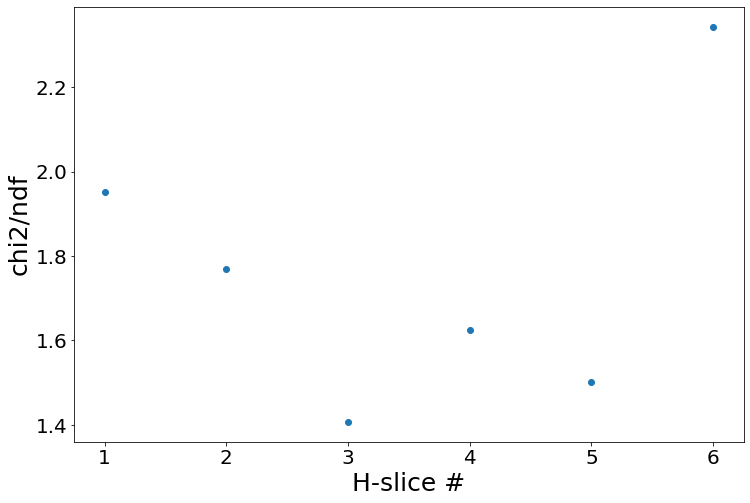

In [24]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, red_chi2, yerr=0, fmt="o")
plt.xlabel('H-slice #',fontsize=25)
plt.ylabel('chi2/ndf',fontsize=25)
plt.show()